<a href="https://colab.research.google.com/github/matsunagalab/lecture_OR/blob/main/solver01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ソルバ1: PuLPを使ってみる

## Google Colabを使ってみる

Google Colaboratory (Colab)は、ブラウザ上でプログラミングを行うためのwebサービスです。これを使うと個々のデバイスに環境構築を行う手間が省けるので、今回はこのwebサービスを用いて演習を行います。

まず最初に、この文書は単なるブログ記事ではなくて、「Jupyter notebook」という形式になっていて、灰色のかたまりに書いてあるプログラムコードをブラウザ上で編集し実行することができます。

コードが書いてある灰色のかたまりを「セル」と呼びます。セルに書いたコードを実行するには、ShiftとReturnを同時に押します(Shift+Return)。いろいろと書き換えて実験してみてください。変数を用いた場合、実行した順に変数にメモリ領域が割り当てられて、次のセルを実行する際にそれを利用することができます。

下のセルのPythonコードをShiftとReturnを同時に押して実行してみましょう。1+1の結果である2が出力されたでしょうか？確認したら自分でセルを編集して1+1以外の式を実行してみましょう(例えば1+2など)

In [1]:
1 + 1

2

ちなみにコードの実行はGoogleのサーバで行われて、その結果がブラウザへ返されています。したがって、余りに重たいメモリを消費する計算はやめたほうが良いですが、一人ひとりへは少ないCPUやメモリ資源だけ割り当てられていてそれ以上使えないようになっているので気をつかう必要はありません。

編集したら、Ctrl+s (Windows) または Cmd+s (Mac) を押すとnotebookを保存することができます。

## 覚えるべきPythonの型と文法

これから学ぶPuLPを最低限使うためには以下の文法を知っておく必要があります。一つずつ内容を理解しながら実行してください

In [2]:
# 整数を保持する変数の作成
my_var = 1
print(my_var)

1


In [3]:
# 文字列を保持する変数の作成
my_var = 'x1'
print(my_var)

x1


In [4]:
# 変数を用いた演算
x = 1
y = 2
z = x + y
print(z)

3


In [5]:
# リストの作成
my_list = [1, 2, 3, 4, 5]
print(my_list)

my_list[1]

[1, 2, 3, 4, 5]


2

In [6]:
# リストの要素について繰り返すループ
for v in my_list:
     y = v + 1
     print('element = ', y)

element =  2
element =  3
element =  4
element =  5
element =  6


## 練習問題1: リストの要素の和を求めてみよう

In [7]:
# 以下のリストの要素の和を求めてください
my_list = [1, 2, 3, 4, 5]

# ここにコードを書いて実行

## PuLPの紹介とインストール

今回使うパッケージであるPuLPをインストールします。下のセルのPythonコードをShift+Returnを押して実行してください。

In [8]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 84.3 MB/s eta 0:00:00


インストールが成功したか確認するために、pythonでPuLPパッケージをimportしてみます。なにも出力されなければ成功です。

In [9]:
# PuLPをロードする
from pulp import *

## 線形計画問題を解いてみよう

以下の簡単な線形計画問題をPuLPで解いてみましょう

$$
{\rm minimize}\  z=-x_1-x_2\\
{\rm subject\ to}\ \ 2x_1+x_2 \le 2\\
x_1 + 2x_2 \le 2\\
x_1,x_2 \ge 0
$$

In [10]:
# 問題を定義する、最小化する場合
problem = LpProblem('Problem Name', LpMinimize)

# 決定変数 𝑥_1≥0の定義
x1 = LpVariable('x1', 0, None, LpContinuous)

# 決定変数 𝑥_2≥0の定義
x2 = LpVariable('x2', 0, None, LpContinuous)

# 目的関数 𝑧=-𝑥_1-𝑥_2 の定義
problem += - x1 - x2

# 制約条件 2𝑥_1+𝑥_2≤2 の定義
problem += 2*x1 + x2 <= 2.0

# 制約条件 𝑥_1+2𝑥_2≤2 の定義
problem += x1 + 2*x2 <= 2.0

# 問題を出力して確認
print()
print("-" * 10)
print(problem)

# 定義した問題を解く
problem.solve()

# 解けたかどうかのチェック
# “Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print()
print("-" * 10)
print('Status:', LpStatus[problem.status])

# 最適解の出力
for v in problem.variables():
    print(v.name, '=', v.varValue)

# 最適値の出力
print('The optimum value is ', value(problem.objective))


----------
Problem_Name:
MINIMIZE
-1*x1 + -1*x2 + 0
SUBJECT TO
_C1: 2 x1 + x2 <= 2

_C2: x1 + 2 x2 <= 2

VARIABLES
x1 Continuous
x2 Continuous


----------
Status: Optimal
x1 = 0.66666667
x2 = 0.66666667
The optimum value is  -1.33333334


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


## 練習問題2: 標準形を解く (第3回小レポート課題より)

過去にシンプレックス法の練習問題で解いた問題を、PuLPに解かせてください。自分で解いた結果と一致することを確認しましょう。

$$
{\rm minimize}\  z=-4x_1\\
{\rm subject\ to}\ \ x_1+x_2+x_3 = 2\\
x_1 + 3x_2 + x_4 = 3\\
x_1, x_2, x_3, x_4 \ge 0\\
$$

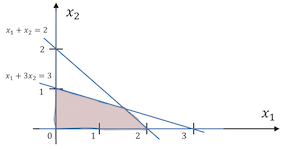


In [ ]:
# ここにコードを書いて実行

## 練習問題3: 標準形を解く (第4回小レポート課題より)

過去の小レポートをPuLPに解かせましょう。自分で解いた結果と一致することを確認しましょう。

$$
{\rm minimize}\  z=-2x_1-x_2-x_3\\
{\rm subject\ to}\ \ x_1+2x_2 = 12\\
x_1 + 4x_2 + 2x_3 = 20\\
x_1, x_2, x_3 \ge 0\\
$$


In [ ]:
# ここにコードを書いて実行